In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv(
'C:/Users/Денис/Desktop/python/model1/ba.csv')


In [3]:
data.info()
for i in range(len(data['Тяжесть'])):
    if data.loc[i,'Тяжесть'] == 2:
        data.loc[i,'Тяжесть'] = 0
    elif data.loc[i,'Тяжесть'] == 3:
        data.loc[i,'Тяжесть'] = 1
    else:
        data.loc[i,'Тяжесть'] = 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Тяжесть           174 non-null    int64  
 1   Уровень_VIP       104 non-null    float64
 2   Уровень_SP        104 non-null    float64
 3   SNP_rs896         104 non-null    float64
 4   SNP_rs2072100     104 non-null    float64
 5   SNP_rs3771829     104 non-null    float64
 6   SNP_rs3823082     102 non-null    float64
 7   VAR_mc            174 non-null    int64  
 8   aVNN_mc           174 non-null    int64  
 9   SDNN_mc           174 non-null    int64  
 10  pNN50             174 non-null    int64  
 11  rMSSD             174 non-null    int64  
 12  SDNNidx_mc        174 non-null    int64  
 13  SDANN_mc          174 non-null    int64  
 14  VLF               174 non-null    int64  
 15  LF_Симпатика      174 non-null    int64  
 16  HF_Парасимпатика  174 non-null    int64  
 1

In [4]:
data_gene = data.dropna(subset=['SNP_rs896'])
data_gene['SNP_rs3823082'] = data_gene['SNP_rs3823082'].fillna(2)

data_veg = data.drop(['Уровень_VIP','Уровень_SP', 'SNP_rs896', 'SNP_rs2072100', 'SNP_rs3771829', 'SNP_rs3823082'], axis=1)

C:\Users\Денис\AppData\Local\Temp\ipykernel_11024\3816906847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gene['SNP_rs3823082'] = data_gene['SNP_rs3823082'].fillna(2)


In [5]:
X = data_gene.drop(['Тяжесть'], axis=1)
y = data_gene['Тяжесть']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=12345,
    stratify=y
)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Количество строк в y_train по классам: [42 36]
Количество строк в y_test по классам: [14 12]
(78, 19)
(78,)
(26, 19)
(26,)


In [6]:
scores = np.zeros((22, 22))
best_model_tree = None
best_result = 0
for i in range(1,11):
    for j in range(2,22): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=i, max_leaf_nodes=j)
        model.fit(X_train, y_train)
        result = model.score(X_test, y_test)
        scores[i,j] = result
        if result > best_result:
            best_result = result 
            best_max_depth = i
            best_max_leaf_nodes = j
            best_model_tree = model
print(f'best max_depth = {best_max_depth}, best_max_leaf_nodes {best_max_leaf_nodes}: {best_result}')

best max_depth = 8, best_max_leaf_nodes 14: 1.0


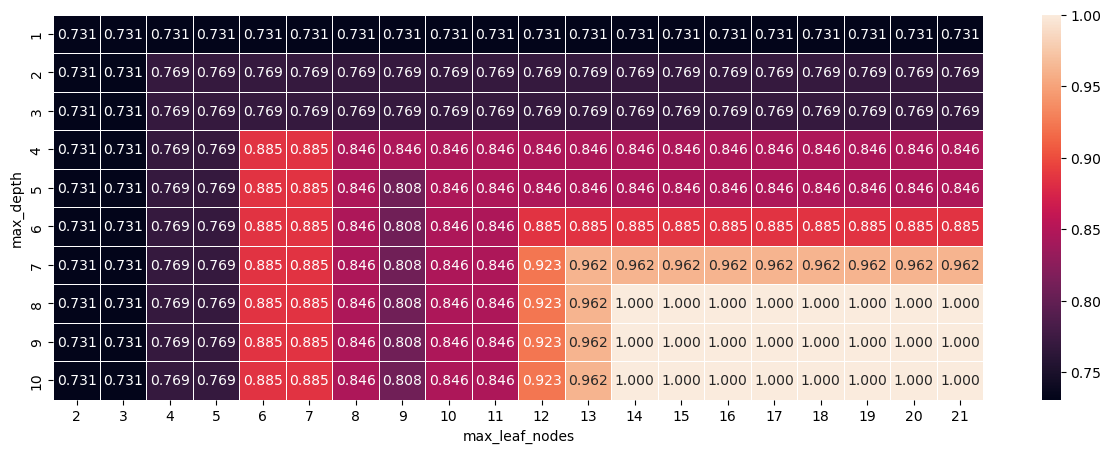

In [7]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores[1:11,2:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,11));

In [8]:
scores = np.zeros((22, 22))
best_model_tree_cross = None
best_result = 0
for i in range(1,11):
    for j in range(2,22): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=i, max_leaf_nodes=j)
        model.fit(X_train, y_train)
        result = (cross_val_score(model, X_train, y_train, cv=5)).mean()
        scores[i,j] = result
        if result > best_result:
            best_result = result 
            best_max_depth = i
            best_max_leaf_nodes = j
            best_model_tree_cross = model
print(f'best max_depth = {best_max_depth}, best_max_leaf_nodes {best_max_leaf_nodes}: {best_result}')

best max_depth = 7, best_max_leaf_nodes 12: 0.7649999999999999


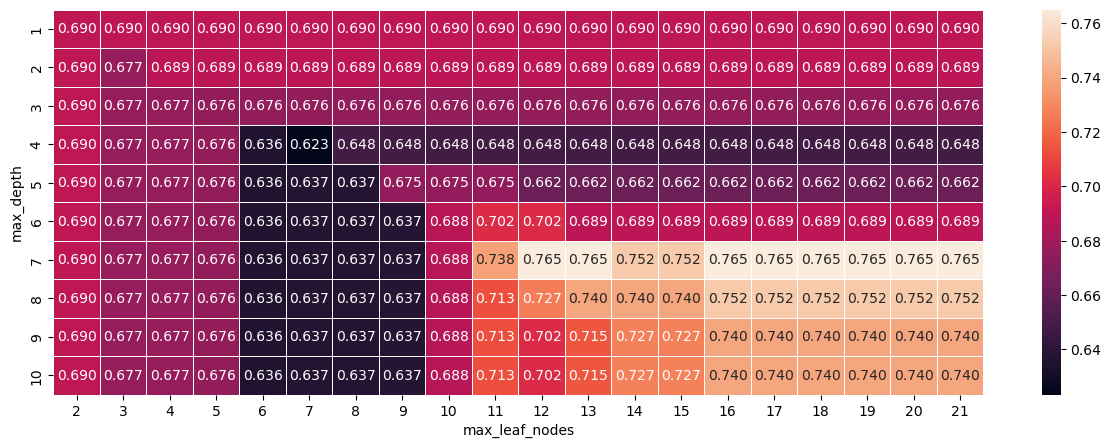

In [9]:
plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores[1:11,2:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,11));

In [ ]:
#param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

param_grid = {'criterion':['entropy'], 'max_depth': np.arange(1, 21),  'max_leaf_nodes':np.arange(2, 22)}

dtree_model=DecisionTreeClassifier()

dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)

dtree_gscv.fit(X_train, y_train)
results = pd.DataFrame(dtree_gscv.cv_results_)
dtree_gscv.best_params_


In [ ]:
scores = np.array(results.mean_test_score).reshape(20, 20)

plt.figure(figsize=(15, 7))
ax = sns.heatmap(scores[0:21,0:22], annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(2,22), yticklabels=range(1,21));


In [ ]:
from sklearn import tree
from graphviz import Source
graph = Source(tree.export_graphviz(best_model_tree_cross, out_file=None,
                                    feature_names=data.columns[1:],
                                    #class_names=['Not survived', 'Survived'],
                                    filled=True, rounded=True
                                   ))
graph

In [ ]:
best_model_rnd = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_estimators = est#  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_model_rnd = model
print(f'best_n_estimators = {best_n_estimators} : {best_result}')

In [ ]:
grid = { 
    'n_estimators': np.arange(1, 11),
    'max_features': ['sqrt', 'log2'],
    'max_depth' : np.arange(1, 11),
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
results = pd.DataFrame(dtree_gscv.cv_results_)
print(rf_cv.best_params_)
print(rf_cv.best_score_)




In [ ]:
grid = { 
    'n_estimators': np.arange(1, 11),
    'max_features': ['sqrt'],
    'max_depth' : np.arange(1, 11),
    'criterion' :['entropy'],
    'random_state' : [18]
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
results = pd.DataFrame(rf_cv.cv_results_)
rf_cv.best_params_
rf_cv.best_score_

In [ ]:
scores = np.array(results.mean_test_score).reshape(10, 10)

plt.figure(figsize=(15, 5))
ax = sns.heatmap(scores, annot=True, fmt=".3f", linewidth=.5)
ax.set(xlabel="max_leaf_nodes", ylabel="max_depth", xticklabels=range(1,11), yticklabels=range(1,11));

In [ ]:
model_lgst = LogisticRegression(solver='liblinear',
    # норма для регуляризации. 
    penalty='l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C=1,
    # параметр для остановки поиска решения.
    tol=1e-4,
    # Так как распознается 2 класса.
    multi_class='ovr')
model_lgst.fit(X_train, y_train) # обучите модель на тренировочной выборке
result = model_lgst.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
print(f'result = {result}')

In [ ]:
KNeig_best = None
best_result = 0
for neigh in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = neigh, metric = 'minkowski', p = 2)
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    result = model.score(X_test, y_test) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_result = result # сохраните наилучшую модель
        best_n_neighbors = neigh#  сохраните наилучшее значение метрики accuracy на валидационных данных
        KNeig_best = model

print(f'best_n_neighbors = {best_n_neighbors} : {best_result}')

In [ ]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10]:
    for C in [0.001, 0.01, 0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
clf = SVC()
params = {'C': np.logspace(0, 5, 5),
          'gamma': np.logspace(0, 5, 5)}

random_search = RandomizedSearchCV(
    estimator=clf, param_distributions=params, n_iter=25, n_jobs=-1,
    cv=StratifiedKFold(n_splits=5)
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

best_model_tree
best_model_tree_cross
dtree_gscv
best_model_rnd
rf_cv
model_lgst
logreg
KNeig_best
svm

In [ ]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

acc_dict['best_model_tree'] = best_model_tree.score(X_test, y_test)
acc_dict['best_model_tree_cross'] = best_model_tree_cross.score(X_test, y_test)
acc_dict['dtree_gscv'] = dtree_gscv.score(X_test, y_test)
acc_dict['best_model_rnd'] = best_model_rnd.score(X_test, y_test)
acc_dict['rf_cv'] = rf_cv.score(X_test, y_test)
acc_dict['model_lgst'] = model_lgst.score(X_test, y_test)
#acc_dict['logreg'] = logreg.score(X_test, y_test)
acc_dict['KNeig_best'] = KNeig_best.score(X_test, y_test)
acc_dict['svm'] = svm.score(X_test, y_test)

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

display(log.sort_values(by='Accuracy'))

In [ ]:
train_predictions = dtree_gscv.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

In [ ]:
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)

dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(score)

In [ ]:
plt.figure(0).clf ();
plt.figure(figsize=(9, 9));

y_pred = best_model_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_tree', " AUC="+str(auc)));

y_pred = best_model_tree_cross.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_tree_cross', " AUC="+str(auc)));

y_pred = best_model_rnd.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('best_model_rnd', " AUC="+str(auc)));

y_pred = model_lgst.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('model_lgst', " AUC="+str(auc)));

#y_pred = logreg.predict_proba(X_test)[:, 1]
#fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
#auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
#plt.plot (fpr,tpr,label=('logreg', " AUC="+str(auc)));

y_pred = KNeig_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('KNeig_best', " AUC="+str(auc)));

#y_pred = svm.predict_proba(X_test)[:, 1]
#fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
#auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
#plt.plot (fpr,tpr,label=('svm', " AUC="+str(auc)));

y_pred = dtree_gscv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('dtree_gscv', " AUC="+str(auc)));

y_pred = rf_cv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('rf_cv', " AUC="+str(auc)));

y_pred = dclf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred)
auc = round(metrics.roc_auc_score (y_test, y_pred), 4)
plt.plot (fpr,tpr,label=('DummyClassifier', " AUC="+str(auc)));

#add legend
plt.legend();